---
# Python 人工智能入门 毕业项目
# 机器学习预测金融风险
## Kimi
## 2019年3月29日
---


## 目录
<ul>
<li><a href="#definition">定义</a></li>
<li><a href="#analysis">分析</a></li>
<li><a href="#implementation">实现</a></li>
<li><a href="#result">结果</a></li>
<li><a href="#conclusion">结论</a></li>   
</ul>



---
<a id="definition"></a>
## Ⅰ.定义


### 1.项目概况
在信贷平台中，坏账率是一个很重要的指标。关系着公司的直接利益。在传统的方式中，我们一般通过申请人的信用信息，收入情况来评判申请人是否有偿还能力，是否会导致坏账。在本项目中，我们将通过机器学习算法对每一个申请人的基本信息、交易信息等数据进行甄别，多维度预测申请人坏账率。减少信贷公司的坏账损失。

现在集团收集了一段时间内玩家的贷款记录`loan.csv`。数据集包括了贷款人的基本信息，以及还款和未还款的信息。

### 2.问题陈述

在信贷平台中，坏账率是一个很重要的指标。关系着公司的直接利益。在传统的方式中，我们一般通过申请人的信用信息，收入情况来评判申请人是否有偿还能力，是否会导致坏账。在本项目中，我们将通过机器学习算法对每一个申请人的基本信息、交易信息等数据进行甄别，多维度预测申请人坏账率。减少信贷公司的坏账损失。

现在集团收集了一段时间内玩家的贷款记录`loan.csv` 以及字段描述集`LCDataDictionary.xlsx`。数据集包括了贷款人的基本信息，以及还款和未还款的信息。
通过分析数据集，能预测一个新的申请用户的坏账率的可能性。对于申请人来说，只有坏账和不坏帐两种情况。根据算法，我们可以推断这是一个分类问题。
将数据集分成20%测试集，80%验证集。在此案例中，我们不希望真实坏账的用户，被预测为不坏账的用户。那么，需要高精确度的结果。假定我们希望的精确度是90%。



---
<a id="analysis"></a>
## Ⅱ.分析

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 请在这一代码框内编写在这部分你需要的程序
# 包括但不限于
# * 导入数据
df = pd.read_csv('loan.csv')

# * 绘制可以表达你想法的图像
# 你可以自由的使用任意数量和任意格式的代码框，但请在最终提交的报告中注意报告的整洁与通顺
# 查看数据的前5行
df.head()

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# 查看数据的基本信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

#### 我们查看了数据集的基本信息，总数据行数为 887379。

In [4]:
# 查看数据的基本描述
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


### 分析
通过以上数据的概览，我们需要找到对应的结果判断的数据。以及推测能对结果产生影响的数据，并把相关的数据提取整合出来。
通过整理表格我们发现``loan_status`` 字段。这个字段有3个状态，``Full_Paid``, ``Charged Off``,``Current``。 而我们的问题是推测用户是否会坏账。所以``loan_status``是我们的结果集。
通过``loan_status`` 我们可以得知数据集中用户的坏账情况。我们认为``Full_Paid`` 为正常状态。 ``Charged Off``为坏账状态。 而``Current``状态无法确定是否会最终坏账。所以将``Current``状态的数据先清洗掉



In [5]:
#查看结果集数据的种类的数量
df.loan_status.value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [6]:
#通过结果集 我们对一些结果进行合并处理
#合并一些数据
df[df.loan_status == 'Does not meet the credit policy. Status:Fully Paid'] = 'Fully Paid'
df[df.loan_status == 'Does not meet the credit policy. Status:Charged Off'] = 'Charged Off'

df.loan_status.value_counts()


Current               601779
Fully Paid            209711
Charged Off            46009
Late (31-120 days)     11591
Issued                  8460
In Grace Period         6253
Late (16-30 days)       2357
Default                 1219
Name: loan_status, dtype: int64

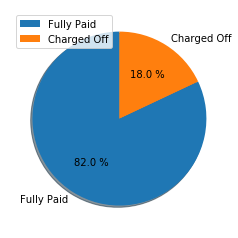

In [7]:
#绘制结果数据
loan_df = df[(df.loan_status == 'Fully Paid') | (df.loan_status  == 'Charged Off')].loan_status.value_counts()
labels = ['Fully Paid', 'Charged Off']
plt.pie(loan_df,labels=labels, autopct='%3.1f %%',
        shadow=True, labeldistance=1.1, startangle = 90,pctdistance = 0.6)
plt.legend()

In [8]:
(df['loan_amnt'] != df['funded_amnt']).mean()

0.0021648021871150886

通过对结果集的分析，我们可以知道。当前有18%的坏账率。

In [9]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [10]:
# 读取数据字典 确定每个字段的意义
df_dic=pd.read_excel('LCDataDictionary.xlsx' , index_col='LoanStatNew')
pd.set_option('display.max_colwidth',500)
pd.set_option('display.max_rows',90)
df_dic.loc[df.columns]


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """


,Description
LoanStatNew,
id,A unique LC assigned ID for the loan listing.
member_id,A unique LC assigned Id for the borrower member.
loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
funded_amnt,The total amount committed to that loan at that point in time.
funded_amnt_inv,The total amount committed by investors for that loan at that point in time.
term,The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if the loan originates.
grade,LC assigned loan grade


#### 参数集 字段分析
- ``addr_state`` 申请人所在州 string
- ``annual_inc`` 申请人自己所申报的年度收入 float
- ``annual_inc_joint`` 共用借款人的合并年收入 float 
- ``application_type`` 判断是独立贷款还是合并贷款 分类 INDIVIDUAL JOINT
- ``collection_recovery_fee`` 邮递手续费 float
- ``delinq_2yrs`` 过去两年发生30天以上拖欠事件的次数 float
- ``desc`` 描述 string
- ``dti`` 债务和收入比 float
- ``dti-joint`` 联合借债人债务和收入比 float
- ``earliest_cr_line`` 借款人最早的信用记录 日期格式
- ``emp_length`` 雇佣年数 > 10 years 1-10years <1year
- ``emp_title`` 当前工作的职位
- ``home_ownership`` 房屋居住情况(RENT, OWN, MORTGATE,OTHER)
- ``issue_d`` 获取贷款的月份
- ``loan_status`` 当前贷款的状态
- ``pymnt_plan`` 标志是否为贷款提供了还款计划
- ``url`` 贷款链接
- ``purpose`` 贷款目的 string
- ``title`` 贷款标题 string
- ``zip_code`` 贷款人的邮编 前三位 string
- ``inq_last_6mths`` 贷款人过去6个月的查询次数 float
- ``mths_since_last_delinq`` 贷款人上次犯罪到现在的月份 float
- ``mths_since_last_record`` 上次公开记录到现在的月份 float
- ``open_acc`` 借款人信用档案中，未结的信用额度 float
- ``pub_rec`` 贬损的公共记录数量 float
- ``revol_bal`` 总信贷周转余额 float
- ``revol_util`` 循环利用率 float
- ``total_acc`` 借款人信用档案中，当前信用额度总数 float
- ``initial_list_status`` 贷款的初始状态 分类数据 W F
- ``out_prncp`` 剩余未偿还本金 float
- ``out_prncp_inv`` 剩余未偿还投资人本金 float
- ``total_pymnt`` 到目前为止 收到的付款总额 float
- ``total_pymnt_inv`` 到目前位置 投资者收到的付款总额 float
- ``total_rec_prncp`` 本金收回 float
- ``total_rec_int`` 利息收回 float
- ``total_rec_late_fee`` 滞纳金收回 float
- ``recoveries`` 回收费用 float
- ``collection_recovery_fee`` 手续费
- ``last_pymnt_d`` 上次收到金额的月份 date
- ``last_pymnt_amnt`` 上次收到的金额量 float
- ``next_pymnt_d`` 下次付款日期 date
- ``last_credit_pull_d`` 最近提供信贷日期 date
- ``collections_12_mths_ex_med`` ？
- ``mths_since_last_major_derog`` 差评月份 float
- ``policy_code`` 政策代码  分类: 1 or 2
- ``acc_now_delinq`` 当前拖欠的账户金额 float
- ``tot_coll_amt`` 欠款总额 float
- ``tot_cur_bal`` 所有账户的当前余额 float
- ``open_acc_6m`` 6个月内开启的交易 float
- ``open_il_6m`` 当前有效分期付款数量 6个月 float
- ``open_il_12m`` 当前有效分期付款数量 12个月 float
- ``open_il_24m`` 当前有效分期付款的数量 24个月 float
- ``mths_since_rcnt_il`` 最近开启分期账户的月数 float
- ``total_bal_il`` 所有分期账户的当前余额 float
- ``il_util`` 所有分期账户的信用比 float
- ``open_rv_12m`` 所有相关的交易 12个月 float
- ``open_rv_24m`` 所有相关的交易 24个月 float
- ``max_bal_bc`` 所有周转账户的最大金额 float
- ``all_util`` 所有交易的金额限制 float
- ``inq_fi`` 个人金融本金 float
- ``total_cu_tl`` 金融交易 float
- ``inq_last_12m`` 信用本金交易 12个月 float
- ``loan_amnt``  申请金额 float
- ``funded_amnt`` 批复金额 float
- ``funded_amnt_inv`` 最终获得金额 float
- ``term`` 贷款期限 string
- ``int_rate`` 利率 float
- ``installment`` 每月还贷 float
- ``grade`` 贷款等级 分类数据 A B C D4个等级
- ``sub_grade`` 次级等级

#### 通过以上字段分析，人为先做第一步判断。分离出可能会影响结果的数据
- ``annual_inc`` 和 ``annual_inc_joint`` 均为申报收入 合并为``annual_inc``
-  ``dti`` 和 ``dti_joint`` 均为负债率 合并为 ``dti``
-  ``delinq_2yrs`` 过去两年发生30天以上拖欠事件的次数
-  ``emp_length`` 雇佣年数
-  ``home_ownership`` 房屋居住情况
-  ``pub_rec`` 贬损的公共记录数量
-  ``funded_amnt`` 批复金额 float
- ``term`` 贷款期限 string
-  ``int_rate`` 利率 float
-  ``grade`` 贷款等级 分类数据 A B C D E F G 7个等级

以上字段是我认为可能影响坏账``loan_amnt``的字段。

---
<a id="implementation"></a>
## Ⅲ. 实现

In [12]:
#因为本次是处理坏账率的数据 当前正常支付数据无法判断是否会坏账 所以 我们只留下Fully Paid 和 Charged Off的数据
df = df[(df.loan_status == 'Fully Paid') | (df.loan_status == 'Charged Off')]

In [38]:
# 找到关键的字段

df_clean =  df[['loan_status', 'application_type', 'annual_inc', 'annual_inc_joint', 'dti', 'dti_joint','delinq_2yrs','emp_length','home_ownership','pub_rec','funded_amnt','term','int_rate','grade']]

df_clean.head()

,loan_status,application_type,annual_inc,annual_inc_joint,dti,dti_joint,delinq_2yrs,emp_length,home_ownership,pub_rec,funded_amnt,term,int_rate,grade
0,Fully Paid,INDIVIDUAL,24000,NaN,27.65,NaN,0,10+ years,RENT,0,5000,36 months,10.65,B
1,Charged Off,INDIVIDUAL,30000,NaN,1,NaN,0,< 1 year,RENT,0,2500,60 months,15.27,C
2,Fully Paid,INDIVIDUAL,12252,NaN,8.72,NaN,0,10+ years,RENT,0,2400,36 months,15.96,C
3,Fully Paid,INDIVIDUAL,49200,NaN,20,NaN,0,10+ years,RENT,0,10000,36 months,13.49,C
5,Fully Paid,INDIVIDUAL,36000,NaN,11.2,NaN,0,3 years,RENT,0,5000,36 months,7.9,A


In [40]:
# 合并 独立借贷人 和 联合借贷人的数据
df_clean[df_clean.application_type == 'JOINT'].loc[:,['annual_inc', 'dti']] = df_clean[df_clean.application_type == 'JOINT'].loc[:,['annual_inc_joint', 'dti_joint']]
# 删除联合借贷人的数据
df_clean.drop(['application_type','annual_inc_joint', 'dti_joint'], axis=1, inplace=True)
df_clean.head()

D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,loan_status,annual_inc,dti,delinq_2yrs,emp_length,home_ownership,pub_rec,funded_amnt,term,int_rate,grade
0,Fully Paid,24000,27.65,0,10+ years,RENT,0,5000,36 months,10.65,B
1,Charged Off,30000,1,0,< 1 year,RENT,0,2500,60 months,15.27,C
2,Fully Paid,12252,8.72,0,10+ years,RENT,0,2400,36 months,15.96,C
3,Fully Paid,49200,20,0,10+ years,RENT,0,10000,36 months,13.49,C
5,Fully Paid,36000,11.2,0,3 years,RENT,0,5000,36 months,7.9,A


In [41]:
#处理emp_length的虚拟变量
#通过值统计 我们发现 Fully Paid 和 Charge Off 我们推测是误填
df_clean['emp_length'].value_counts()

10+ years      76881
2 years        23561
< 1 year       20886
3 years        20380
5 years        18059
1 year         16856
4 years        16197
6 years        14753
7 years        14085
8 years        11849
9 years         9567
Fully Paid      1988
Charged Off      761
Name: emp_length, dtype: int64

In [42]:
#验证是误填的假设 得出结论是误填
df_clean[df_clean['emp_length'] == df_clean['loan_status']].shape[0]

2749

In [43]:
# 删除误填的字段
df_clean = df_clean[(df_clean.emp_length != 'Fully Paid') & (df_clean.emp_length != 'Charged Off')]
# 验证是否删除
df_clean.emp_length.value_counts()

10+ years    76881
2 years      23561
< 1 year     20886
3 years      20380
5 years      18059
1 year       16856
4 years      16197
6 years      14753
7 years      14085
8 years      11849
9 years       9567
Name: emp_length, dtype: int64

In [44]:
# 生成emp_length 的虚拟变量
df_clean = df_clean.join(pd.get_dummies(df_clean['emp_length']).iloc[:,1:])
df_clean.head()

,loan_status,annual_inc,dti,delinq_2yrs,emp_length,home_ownership,pub_rec,funded_amnt,term,int_rate,...,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
0,Fully Paid,24000,27.65,0,10+ years,RENT,0,5000,36 months,10.65,...,1,0,0,0,0,0,0,0,0,0
1,Charged Off,30000,1,0,< 1 year,RENT,0,2500,60 months,15.27,...,0,0,0,0,0,0,0,0,0,1
2,Fully Paid,12252,8.72,0,10+ years,RENT,0,2400,36 months,15.96,...,1,0,0,0,0,0,0,0,0,0
3,Fully Paid,49200,20,0,10+ years,RENT,0,10000,36 months,13.49,...,1,0,0,0,0,0,0,0,0,0
5,Fully Paid,36000,11.2,0,3 years,RENT,0,5000,36 months,7.9,...,0,0,1,0,0,0,0,0,0,0


In [45]:
#查看home_ownership中的分类 
df_clean['home_ownership'].value_counts()

MORTGAGE    124844
RENT        105957
OWN          21985
OTHER          141
NONE            43
ANY              1
Name: home_ownership, dtype: int64

In [46]:
#发现除了MORTAGE RENT 和 OWN 3种之外 其他数据数量较少 不具备分析价值 删除多余的种类
df_clean = df_clean[df_clean.home_ownership.isin(['MORTGAGE', 'RENT', 'OWN'])]
df_clean['home_ownership'].value_counts()

MORTGAGE    124844
RENT        105957
OWN          21985
Name: home_ownership, dtype: int64

In [47]:
#生成home_ownership的虚拟变量
df_clean = df_clean.join(pd.get_dummies(df_clean['home_ownership']).iloc[:,1:])
df_clean.head()

,loan_status,annual_inc,dti,delinq_2yrs,emp_length,home_ownership,pub_rec,funded_amnt,term,int_rate,...,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,OWN,RENT
0,Fully Paid,24000,27.65,0,10+ years,RENT,0,5000,36 months,10.65,...,0,0,0,0,0,0,0,0,0,1
1,Charged Off,30000,1,0,< 1 year,RENT,0,2500,60 months,15.27,...,0,0,0,0,0,0,0,1,0,1
2,Fully Paid,12252,8.72,0,10+ years,RENT,0,2400,36 months,15.96,...,0,0,0,0,0,0,0,0,0,1
3,Fully Paid,49200,20,0,10+ years,RENT,0,10000,36 months,13.49,...,0,0,0,0,0,0,0,0,0,1
5,Fully Paid,36000,11.2,0,3 years,RENT,0,5000,36 months,7.9,...,1,0,0,0,0,0,0,0,0,1


In [48]:
# 查看term中的分类 
df_clean['term'].value_counts()  # 数据没有问题

 36 months    196482
 60 months     56304
Name: term, dtype: int64

In [49]:
# 生成term的虚拟变量
df_clean = df_clean.join(pd.get_dummies(df_clean['term']).iloc[:,1:])
df_clean.head()

,loan_status,annual_inc,dti,delinq_2yrs,emp_length,home_ownership,pub_rec,funded_amnt,term,int_rate,...,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,OWN,RENT,60 months
0,Fully Paid,24000,27.65,0,10+ years,RENT,0,5000,36 months,10.65,...,0,0,0,0,0,0,0,0,1,0
1,Charged Off,30000,1,0,< 1 year,RENT,0,2500,60 months,15.27,...,0,0,0,0,0,0,1,0,1,1
2,Fully Paid,12252,8.72,0,10+ years,RENT,0,2400,36 months,15.96,...,0,0,0,0,0,0,0,0,1,0
3,Fully Paid,49200,20,0,10+ years,RENT,0,10000,36 months,13.49,...,0,0,0,0,0,0,0,0,1,0
5,Fully Paid,36000,11.2,0,3 years,RENT,0,5000,36 months,7.9,...,0,0,0,0,0,0,0,0,1,0


In [50]:
#查看grade的分类 有A - G 的数据类型
df_clean['grade'].value_counts()

B    76003
C    65274
A    42265
D    40476
E    19178
F     7653
G     1937
Name: grade, dtype: int64

In [51]:
# 生成grade的虚拟变量
df_clean = df_clean.join(pd.get_dummies(df_clean['grade']).iloc[:,1:])
df_clean.head()

,loan_status,annual_inc,dti,delinq_2yrs,emp_length,home_ownership,pub_rec,funded_amnt,term,int_rate,...,< 1 year,OWN,RENT,60 months,B,C,D,E,F,G
0,Fully Paid,24000,27.65,0,10+ years,RENT,0,5000,36 months,10.65,...,0,0,1,0,1,0,0,0,0,0
1,Charged Off,30000,1,0,< 1 year,RENT,0,2500,60 months,15.27,...,1,0,1,1,0,1,0,0,0,0
2,Fully Paid,12252,8.72,0,10+ years,RENT,0,2400,36 months,15.96,...,0,0,1,0,0,1,0,0,0,0
3,Fully Paid,49200,20,0,10+ years,RENT,0,10000,36 months,13.49,...,0,0,1,0,0,1,0,0,0,0
5,Fully Paid,36000,11.2,0,3 years,RENT,0,5000,36 months,7.9,...,0,0,1,0,0,0,0,0,0,0


In [52]:
#查看loan_status的分类
df_clean['loan_status'].value_counts()

Fully Paid     207572
Charged Off     45214
Name: loan_status, dtype: int64

In [53]:
#生成loan_status的虚拟变量
df_clean = df_clean.join(pd.get_dummies(df_clean['loan_status']).iloc[:,1:])
df_clean.head()

,loan_status,annual_inc,dti,delinq_2yrs,emp_length,home_ownership,pub_rec,funded_amnt,term,int_rate,...,OWN,RENT,60 months,B,C,D,E,F,G,Fully Paid
0,Fully Paid,24000,27.65,0,10+ years,RENT,0,5000,36 months,10.65,...,0,1,0,1,0,0,0,0,0,1
1,Charged Off,30000,1,0,< 1 year,RENT,0,2500,60 months,15.27,...,0,1,1,0,1,0,0,0,0,0
2,Fully Paid,12252,8.72,0,10+ years,RENT,0,2400,36 months,15.96,...,0,1,0,0,1,0,0,0,0,1
3,Fully Paid,49200,20,0,10+ years,RENT,0,10000,36 months,13.49,...,0,1,0,0,1,0,0,0,0,1
5,Fully Paid,36000,11.2,0,3 years,RENT,0,5000,36 months,7.9,...,0,1,0,0,0,0,0,0,0,1


In [54]:
#删除已经生成虚拟变量的变量
df_clean = df_clean.drop(['home_ownership', 'emp_length', 'term', 'grade', 'loan_status'],axis=1)
df_clean.head()

,annual_inc,dti,delinq_2yrs,pub_rec,funded_amnt,int_rate,10+ years,2 years,3 years,4 years,...,OWN,RENT,60 months,B,C,D,E,F,G,Fully Paid
0,24000,27.65,0,0,5000,10.65,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1,30000,1,0,0,2500,15.27,0,0,0,0,...,0,1,1,0,1,0,0,0,0,0
2,12252,8.72,0,0,2400,15.96,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,49200,20,0,0,10000,13.49,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
5,36000,11.2,0,0,5000,7.9,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


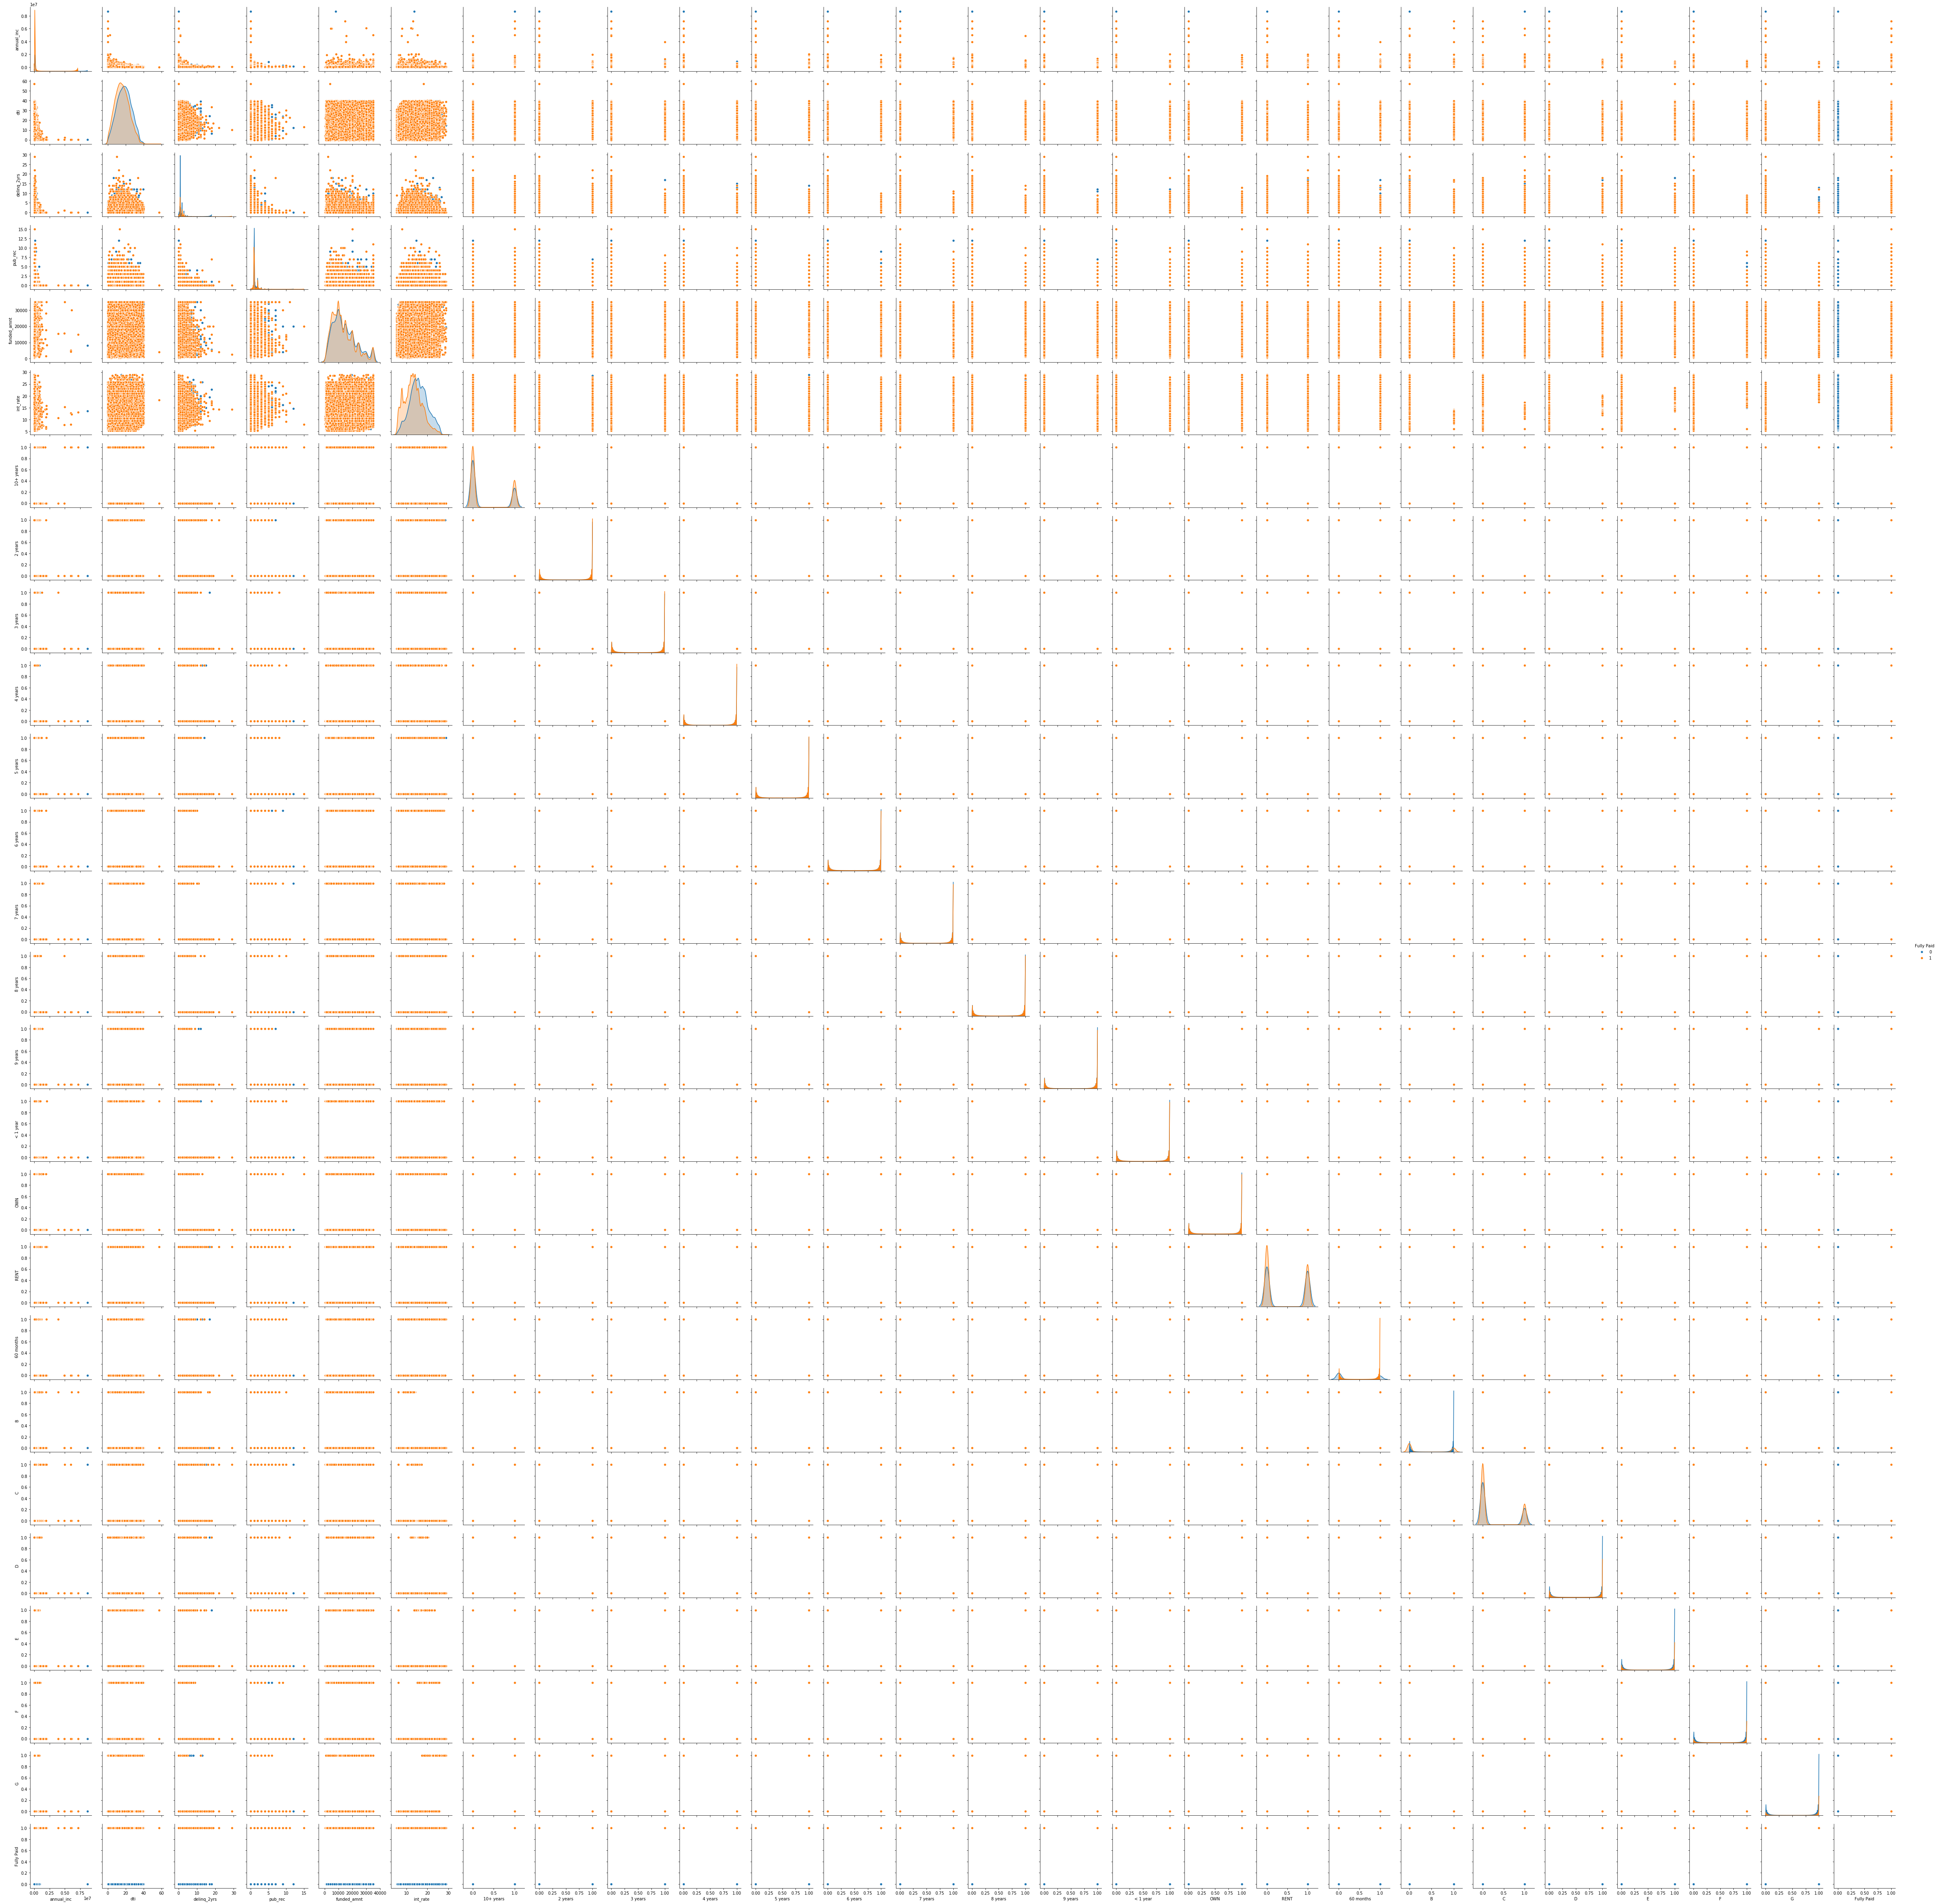

In [68]:
#先用散列图来观察变量的关系
import seaborn as sns
# sns.pairplot(df_clean[['Fully Paid', 'funded_amnt','int_rate','OWN','RENT', 'annual_inc']], hue="Fully Paid");
sns.pairplot(df_clean, hue="Fully Paid");

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


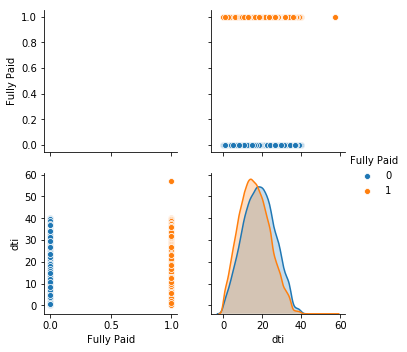

In [61]:
sns.pairplot(df_clean[['Fully Paid', 'dti']], hue="Fully Paid");

#### 从当前的散列图来看，并没有发现特征与结果直接有什么联系。我们仍然使用当前特征进行分析。

In [62]:
#这里要使用逻辑回归的函数
#使用sklearn.cross_validation里的train_test_split模块分割数据集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_clean.drop(['Fully Paid'], axis=1),df_clean['Fully Paid'], test_size = 0.2,random_state = 33)
y_train.value_counts()

1    166154
0     36074
Name: Fully Paid, dtype: int64

In [63]:
#查看测试集的数据
y_test.value_counts()

1    41418
0     9140
Name: Fully Paid, dtype: int64

In [66]:
#引入逻辑回归
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

log_mod = LogisticRegression()
#拟合数据
log_mod.fit(X_train, y_train)

#预测数据
y_predict = log_mod.predict(X_test)


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### 说明
我们使用逻辑回归函数，预测出逻辑回归的模型。


---
<a id="result"></a>
## IV. 结果
经过前面的几步，你已经训练好了自己的模型并计算出了一些结果。这一节，你需要对这些进行讨论与分析

### 模型的评价与验证
在这一部分，你需要对你得出的最终模型的各种技术质量进行详尽的评价。最终模型是怎么得出来的，为什么它会被选为最佳需要清晰地描述。你也需要对模型和结果可靠性作出验证分析，譬如对输入数据或环境的一些操控是否会对结果产生影响（敏感性分析sensitivity analysis）。一些需要考虑的问题：
- _最终的模型是否合理，跟期待的结果是否一致？最后的各种参数是否合理？_
- _模型是否对于这个问题是否足够稳健可靠？训练数据或输入的一些微小的改变是否会极大影响结果？（鲁棒性）_
- _这个模型得出的结果是否可信？_



In [67]:
#模型评估
print(recall_score(y_test, y_predict))
print(accuracy_score(y_test, y_predict))
print(precision_score(y_test, y_predict))

1.0
0.8192175323390957
0.8192175323390957


#### 感觉良好，有``81.9%``的精确率

In [60]:
#继续生成详细的预测报告
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict,target_names=['Charged Off','Fully Paid']))


              precision    recall  f1-score   support

 Charged Off       0.00      0.00      0.00     13669
  Fully Paid       0.82      1.00      0.90     62167

   micro avg       0.82      0.82      0.82     75836
   macro avg       0.41      0.50      0.45     75836
weighted avg       0.67      0.82      0.74     75836



D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### 说明
通过使用classification_report模块获得了当前模型的三个指标的结果（召回率，精确率，调和平均数）
可以发现，虽然有81.9%的精确度。但是其实只能单方面预测。是有巨大误差的。需要研究改进。


---
<a id="conclusion"></a>
## V. 项目结论
我们通过逻辑回归来预测贷款的风险。通过选定的特征，训练出分类模型。然而，当前模型并不能很好的预测出结果。需要额外的探索改进。

### 对项目的思考
我们通过以下方式去预测坏账率
 - 收集数据: 获取历史贷款记录数据和字段说明数据。
 - 准备数据: 读取数据集，并且获取数据集的基本信息。
 - 分析数据: 提取可能的特征。清理异常和缺失值。处理虚拟变量。
 - 训练算法: 通过分析，使用逻辑回归的算法。找到最佳系数。
 - 测试算法: 量化回归结果，观察精确率和召回率。
通过以上过程，我们可以训练出预想的逻辑回归模型。然而，数据集过于庞大而且特征繁多。给预测带来的很多不确定性。
我们需要分析出可能的特征，才有可能正确预测特性。

### 需要作出的改进
当前的分类模型的预测是有巨大误差的，需要改进。以下是我所考虑能改进的方向
 - 数据归一化
 - 找到新的特征


#找到需要归一化的字段
df_cal = df_clean[['annual_inc','dti','delinq_2yrs', 'pub_rec','funded_amnt','int_rate']]
# 归一化处理
df_cal = (df_cal - df_cal.mean())/ df_cal.std()
df_cal.head()

In [74]:
# 使用归一化后的字段来预测
X_train,X_test,y_train,y_test = train_test_split(df_cal,df_clean['Fully Paid'], test_size = 0.2,random_state = 33)

#拟合数据
log_mod.fit(X_train, y_train)

#预测数据
y_predict = log_mod.predict(X_test)


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [75]:
#模型评估
print(recall_score(y_test, y_predict))
print(accuracy_score(y_test, y_predict))
print(precision_score(y_test, y_predict))

0.9932396542566034
0.8191779738122552
0.82276


#### 说明
精确度感觉有所变化，我们调用详细函数查看

In [77]:
print(classification_report(y_test,y_predict,target_names=['Charged Off','Fully Paid']))

              precision    recall  f1-score   support

 Charged Off       0.50      0.03      0.06      9140
  Fully Paid       0.82      0.99      0.90     41418

   micro avg       0.82      0.82      0.82     50558
   macro avg       0.66      0.51      0.48     50558
weighted avg       0.76      0.82      0.75     50558



In [78]:
# 混淆矩阵
confusion_matrix(y_test,y_predict)

array([[  278,  8862],
       [  280, 41138]], dtype=int64)

#### 说明
在数据归一化之后，确实对结果的预测起到了正向结果。
这里我们发现，我们预测坏账率上，确实有所提升。说明归一化可以优化算法结果的。


In [83]:
#我们尝试使用新的特征来做预测 
#total_acc 借款人信用档案中，当前信用额度总数 float
#通过Index获取到筛选的数据
df_acc = df.loc[df_clean.index].total_acc
df_acc.columns=['total_acc']
df_acc.head()


0     9
1     4
2    10
3    37
5    12
Name: total_acc, dtype: object

Text(0.5, 1.0, 'Relation total_acc and loan_status')

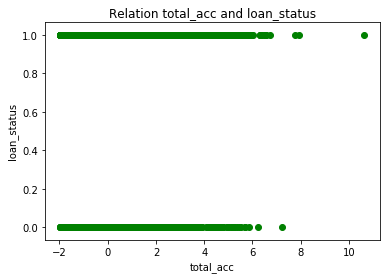

In [95]:
#用图表分析该特征和结果之间的关系
#缩放
df_acc = (df_acc - df_acc.mean())/df_acc.std()
plt.scatter(x=df_acc, y=df_clean['Fully Paid'], c='g');
plt.xlabel('total_acc')
plt.ylabel('loan_status')
plt.title('Relation total_acc and loan_status')

#### 说明 
与结果之间并没有明显的相关性。

In [86]:
#尝试使用installment
df_ins = df.loc[df_clean.index].installment
df_ins.columns=['installment']
df_ins.head()


0    162.87
1     59.83
2     84.33
3    339.31
5    156.46
Name: installment, dtype: object

Text(0.5, 1.0, 'Relation installment and loan_status')

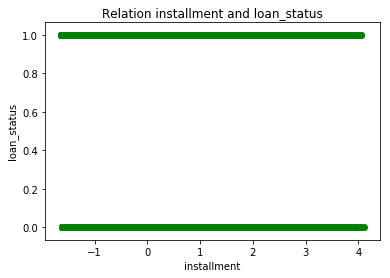

In [94]:
#用图表分析该特征和结果之间的关系
#缩放
df_ins = (df_ins - df_ins.mean())/df_ins.std()
plt.scatter(x=df_ins, y=df_clean['Fully Paid'], c='g');
plt.xlabel('installment')
plt.ylabel('loan_status')
plt.title('Relation installment and loan_status')

In [91]:
#加入备选特征去预测模型
df_cal = df_cal.join(df_acc).join(df_ins)
# 使用归一化后的字段来预测
X_train,X_test,y_train,y_test = train_test_split(df_cal,df_clean['Fully Paid'], test_size = 0.2,random_state = 33)

#拟合数据
log_mod.fit(X_train, y_train)

#预测数据
y_predict = log_mod.predict(X_test)


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [92]:
#模型评估
print(recall_score(y_test, y_predict))
print(accuracy_score(y_test, y_predict))
print(precision_score(y_test, y_predict))

0.9922497464870346
0.8188021678072709
0.8229769509582073


In [93]:
#精度有细微变化
# 混淆矩阵
confusion_matrix(y_test,y_predict)

array([[  300,  8840],
       [  321, 41097]], dtype=int64)

#### 说明
在添加可能性特征进入预测模型之后，并没有对结果产生足够的影响。

Text(0.5, 1.0, 'Loan status ROC')

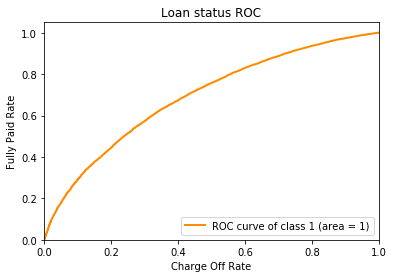

In [113]:
# 引入roc，来确定当前预测的覆盖率
from sklearn.metrics import roc_curve, auc

preds = log_mod.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, preds)
#绘制Roc曲线
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve of class 1 (area = 1)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Charge Off Rate')
plt.ylabel('Fully Paid Rate')
plt.legend(loc="lower right")
plt.title('Loan status ROC')

#### 总结
- 通过项目目标，我们将该问题总结为分类问题。问题预测2个结果，坏账还是正常还款的用户。 
- 找到数据的相关特征，整理数据。建立相关的机器学习的模型。
- 通过模型预测数据的准确率。评估算法。
- 优化当前的模型，提升准确率。